In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

In [2]:
file_path = 'Cancer_Data.csv'  # Sesuaikan path file
data = pd.read_csv(file_path)


# Deskripsi dataset

In [3]:
print("Deskripsi Dataset:")
print(data.info())
print("\nContoh Data:")
print(data.head())

Deskripsi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

# Preprocessing Data

In [4]:
data_cleaned = data.drop(columns=['id', 'Unnamed: 32'])  # Menghapus kolom tidak relevan
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'B': 0, 'M': 1})  # Mapping target

#  Split data menjadi fitur dan target

In [5]:
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']

# Normalisasi fitur

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

 # Split data menjadi training dan testing set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Pembentukan Model KNN

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluasi Model

In [9]:
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.96703297 0.94505495 0.97802198 0.97802198 0.92307692]
Mean CV Score: 0.9582417582417582


In [10]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [11]:
print(f"\nAkurasi Testing: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Akurasi Testing: 0.96

Confusion Matrix:
 [[69  2]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Visualisasi Distribusi Kelas

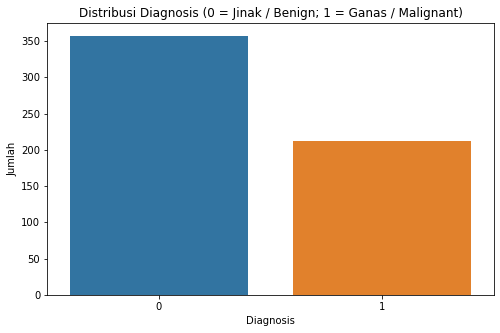

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis', data=data_cleaned)
plt.title('Distribusi Diagnosis (0 = Jinak / Benign; 1 = Ganas / Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

# Boxplot untuk Analisis Outlier

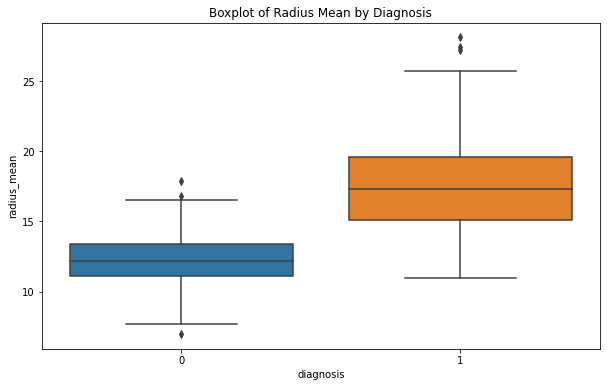

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data_cleaned)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

# Pairplot untuk Visualisasi Hubungan Fitur

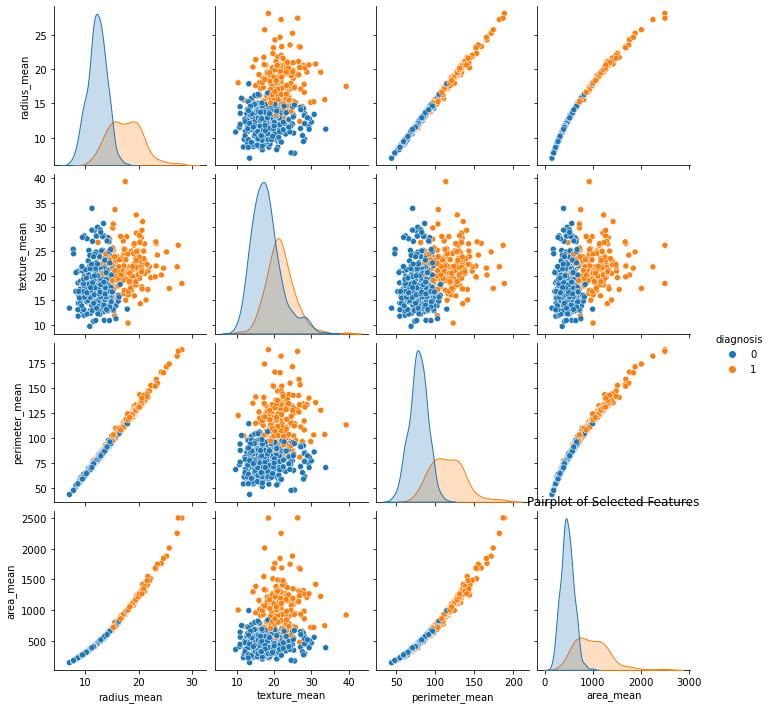

In [14]:
sns.pairplot(data_cleaned, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.title('Pairplot of Selected Features')
plt.show()

# ROC Curve Visualization

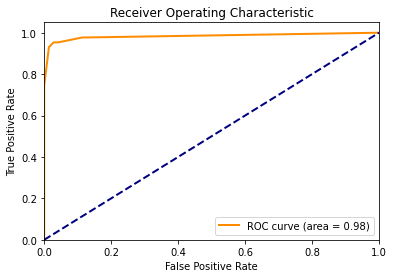

In [15]:
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Visualisasi Akurasi vs. k

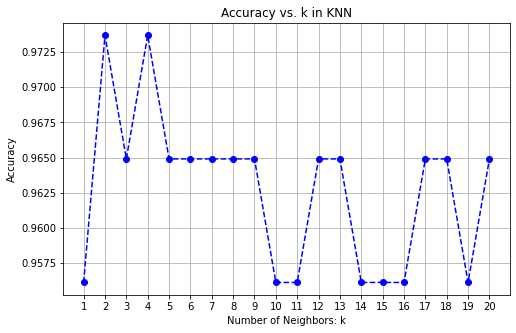

In [16]:
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_k_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_k_pred))

plt.figure(figsize=(8,5))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. k in KNN')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid()
plt.show()

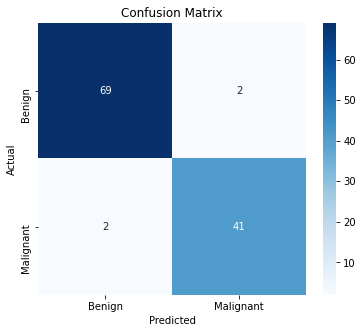

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()